# Introduction 

* ADHD(Attention-Deficit/Hyperactivity Disorder) is a disorder that is characterized by an ongoing pattern of one or more person's behaviour. This disorder impacts a person's daily life including social relationships and school or work performance, which inturn can aqffect academic and professional achievements 
* Symptoms of this disorder are detected at an early age but can contniue through adolescence and into adulthood.
* The following are the symptoms :
*  Difficulty in paying attention 
*  Difficulty in controlling behaiviour
* Being relentless or overactive
* Interrupting others 
* Losing things 
* Forgetting the todo daily activities 

* Scientists have not yet identified the specific causes of ADHD. While there is growing evidence that genetics contribute to ADHD and several genes have been linked to the disorder, no specific gene or gene combination has been identified as the cause of the disorder. However, it is important to note that relatives of individuals with ADHD are often also affected

## Project Overview 
* The WiDS Datathon challenge involves developing a predictive model to determine an individual's sex and ADHD diagnosis. 
* We have to analyze the functional brain imaging from children and adolescents whereby we will incorporate the socio-demographic factors and the profiles and the parent information to enhance predctive accuracy.
* This project aims to uncover brain and behaviour patterns that contribute to a deeper understanding of ADHD and gender related differences 


In [1]:
import pandas as pd 
import numpy as np 
import zipfile  
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [2]:
!pip install --upgrade numpy scipy


Requirement already up-to-date: numpy in c:\users\wanji\anaconda3\envs\learn-env\lib\site-packages (1.24.4)
Requirement already up-to-date: scipy in c:\users\wanji\anaconda3\envs\learn-env\lib\site-packages (1.10.1)


## Load Datasets 

* Train Dataset

In [3]:
import zipfile

zip_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025.zip"

# List files inside the ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())  # This will list all files inside the ZIP


['Data Dictionary.xlsx', 'SAMPLE_SUBMISSION.xlsx', 'TEST/TEST_CATEGORICAL.xlsx', 'TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv', 'TEST/TEST_QUANTITATIVE_METADATA.xlsx', 'TRAIN/TRAINING_SOLUTIONS.xlsx', 'TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx', 'TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv', 'TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx']


In [4]:
# File paths
train_fc_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025\TRAIN\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_cat_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025\TRAIN\TRAIN_CATEGORICAL_METADATA.xlsx"
train_quant_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025\TRAIN\TRAIN_QUANTITATIVE_METADATA.xlsx"

# Load datasets
train_fc = pd.read_csv(train_fc_path)
train_cat = pd.read_excel(train_cat_path)
train_quant = pd.read_excel(train_quant_path)

# Inspect data
print("Functional Connectome Matrices Shape:", train_fc.shape)
print("Categorical Metadata Shape:", train_cat.shape)
print("Quantitative Metadata Shape:", train_quant.shape)

train_cat.head()

Functional Connectome Matrices Shape: (1213, 19901)
Categorical Metadata Shape: (1213, 10)
Quantitative Metadata Shape: (1213, 19)


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


* Test Dataset 

In [5]:
# File paths
test_fc_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025\TRAIN\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_cat_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025\TRAIN\TRAIN_CATEGORICAL_METADATA.xlsx"
test_quant_path = r"C:\Users\wanji\Desktop\WIDS Challenge\widsdatathon2025\TRAIN\TRAIN_QUANTITATIVE_METADATA.xlsx"

# Load datasets
test_fc = pd.read_csv(train_fc_path)
test_cat = pd.read_excel(train_cat_path)
test_quant = pd.read_excel(train_quant_path)

# Inspect data
print("Functional Connectome Matrices Shape:", test_fc.shape)
print("Categorical Metadata Shape:", test_cat.shape)
print("Quantitative Metadata Shape:", test_quant.shape)

train_cat.head()  

Functional Connectome Matrices Shape: (1213, 19901)
Categorical Metadata Shape: (1213, 10)
Quantitative Metadata Shape: (1213, 19)


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [6]:
##Merge the datasets: Training and testing 
train_data = train_fc.merge(train_quant, on = "participant_id").merge(train_cat, on = "participant_id")
train_data.shape
train_data.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,11.889002,2018,1,0.0,1,2,21,45,21,45
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,7.670088,2015,1,1.0,8,1,6,5,0,15
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,7.743896,2019,1,0.0,0,2,18,35,9,20
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,NaN,2017,1,0.0,0,2,21,40,21,40
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,NaN,2019,1,2.0,8,2,9,35,0,0


In [7]:
##Merge the datasets: Training and testing 
test_data = test_fc.merge(test_quant, on = "participant_id").merge(test_cat, on = "participant_id")
test_data.shape
test_data.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,11.889002,2018,1,0.0,1,2,21,45,21,45
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,7.670088,2015,1,1.0,8,1,6,5,0,15
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,7.743896,2019,1,0.0,0,2,18,35,9,20
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,NaN,2017,1,0.0,0,2,21,40,21,40
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,NaN,2019,1,2.0,8,2,9,35,0,0


## Data Exploration


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19928 entries, participant_id to Barratt_Barratt_P2_Occ
dtypes: float64(19903), int64(24), object(1)
memory usage: 184.4+ MB


In [9]:
train_data.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,853.000000,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,11.245678,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,3.234372,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,8.803901,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,10.739219,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,13.460871,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,21.564453,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19928 entries, participant_id to Barratt_Barratt_P2_Occ
dtypes: float64(19903), int64(24), object(1)
memory usage: 184.4+ MB


In [11]:
test_data.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,853.000000,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,11.245678,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,3.234372,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,8.803901,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,10.739219,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,13.460871,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,21.564453,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [12]:
# check for duplicates in both training and testing data 
train_data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1208    False
1209    False
1210    False
1211    False
1212    False
Length: 1213, dtype: bool

In [13]:
test_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1208    False
1209    False
1210    False
1211    False
1212    False
Length: 1213, dtype: bool

In [14]:
train_data.isnull().sum()

participant_id             0
0throw_1thcolumn           0
0throw_2thcolumn           0
0throw_3thcolumn           0
0throw_4thcolumn           0
                          ..
MRI_Track_Scan_Location    0
Barratt_Barratt_P1_Edu     0
Barratt_Barratt_P1_Occ     0
Barratt_Barratt_P2_Edu     0
Barratt_Barratt_P2_Occ     0
Length: 19928, dtype: int64

In [15]:
print(train_data.columns )

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year',
       'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'],
      dtype='object', length=19928)


In [16]:
test_data.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year',
       'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'],
      dtype='object', length=19928)

In [17]:
# Check the data types of each column
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['participant_id'], dtype='object')


In [18]:
# Check the data types of each column
non_numeric_columns = test_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['participant_id'], dtype='object')


## Visualizations 

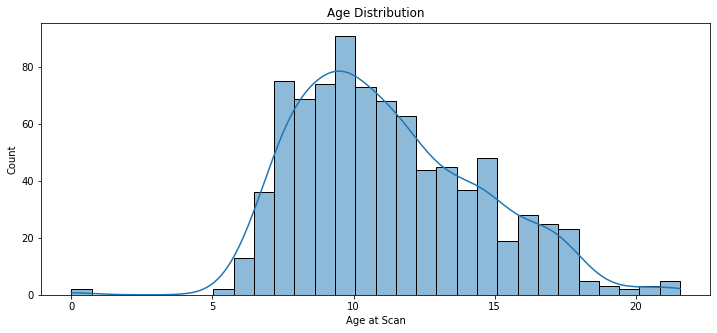

In [19]:
# Age distribution 
plt.figure(figsize=(12,5))
sns.histplot(train_data['MRI_Track_Age_at_Scan'], bins = 30, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age at Scan")
plt.ylabel("Count")
plt.show()

<ipython-input-20-fed9749de6f3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(feature_counts.keys()), y = list(feature_counts.values()), palette = "viridis")


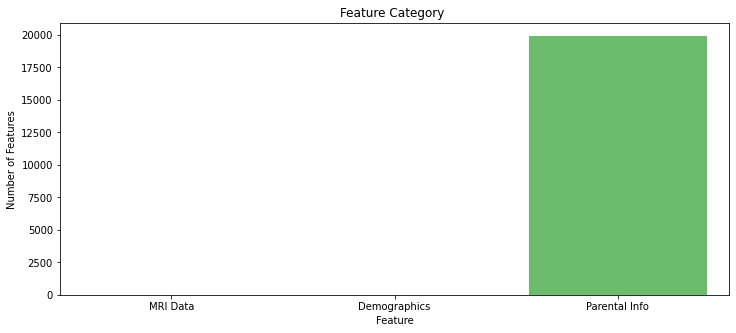

In [20]:
feature_categroies = {
    'MRI Data':[col for col in train_data.columns if 'MRI' in col],
    'Demographics':[col for col in train_data.columns if 'Demo' in col],
    'Parental Info' : [col for col in train_data.columns if 'Parental']
    }

feature_counts = {key: len(value) for key, value in feature_categroies.items()}

#Plot 
plt.figure(figsize=(12,5))
sns.barplot(x = list(feature_counts.keys()), y = list(feature_counts.values()), palette = "viridis")
plt.title("Feature Category ")
plt.xlabel("Feature")
plt.ylabel("Number of Features")
plt.show()

### Feature Analysis 

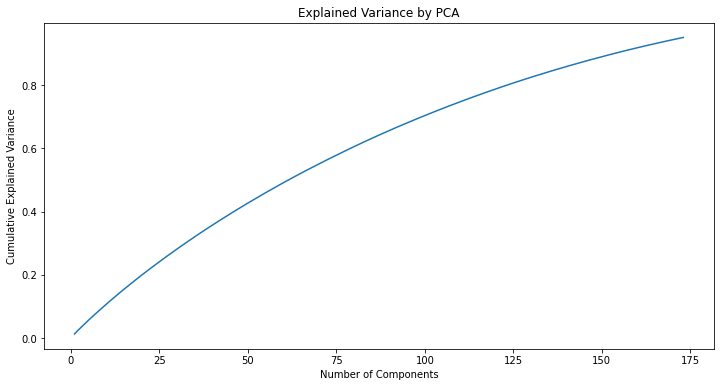

Number of Components: 173


In [21]:
## Isolate the relevant columns
brain_data = train_data.loc[:,'0throw_1thcolumn' : '0throw_199thcolumn']
# Standardization
scaler = StandardScaler()
brain_data_scaled = scaler.fit_transform(brain_data)
# Use PCA
pca = PCA(n_components=0.95)
brain_data_pca = pca.fit_transform(brain_data_scaled)

# Plot 
plt.figure(figsize=(12,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) +1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance by PCA")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

print(f"Number of Components: {brain_data_pca.shape[1]}")

In [22]:
## Selection of related MR columns 
mri_cols = [col for col in train_data.columns if 'MRI' in col]
X_mri = train_data[mri_cols].dropna()

sample_size = min(1000, len(X_mri))
X_mri_sample= X_mri.sample(n= sample_size, random_state = 42)

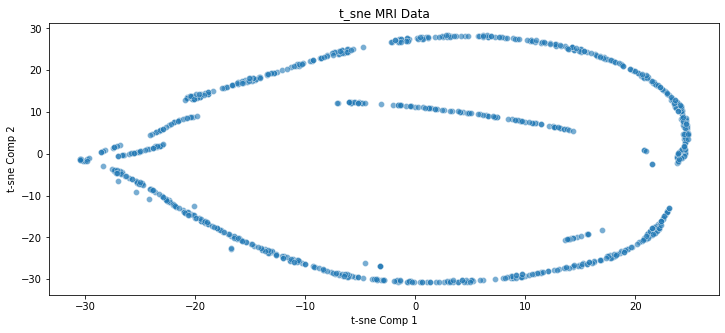

In [23]:
# Non-linear Projections 
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 30)
X_tsne = tsne.fit_transform(X_mri)

# Plot 
plt.figure(figsize=(12,5))
sns.scatterplot(x= X_tsne[:, 0], y = X_tsne[:,1], alpha = 0.6)
plt.title("t_sne MRI Data")
plt.xlabel("t-sne Comp 1")
plt.ylabel("t-sne Comp 2")
plt.show()

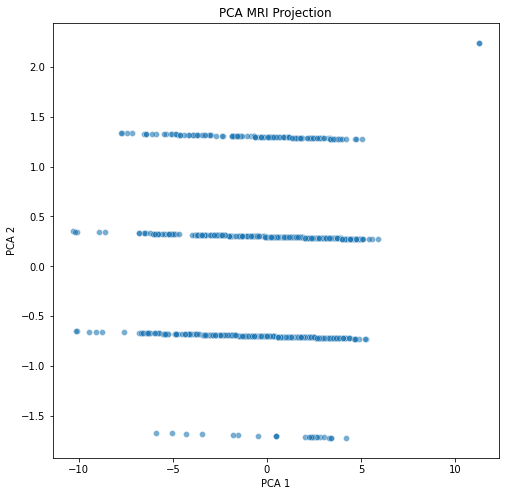

In [24]:
# PCA in 2 dimension
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mri)

# Plot 
plt.figure(figsize=(8, 8))
sns.scatterplot(x= X_pca[:, 0], y=X_pca[:,1], alpha = 0.6)
plt.title("PCA MRI Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### Use KMeans Cluster to find the number of clusters

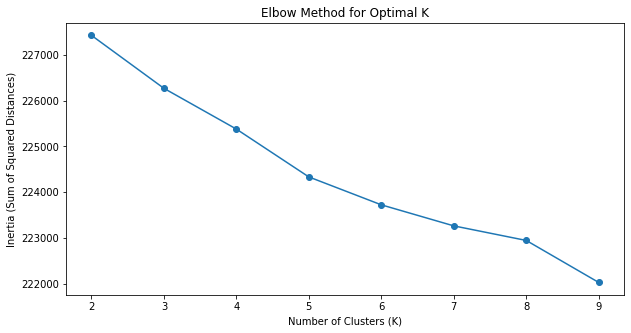

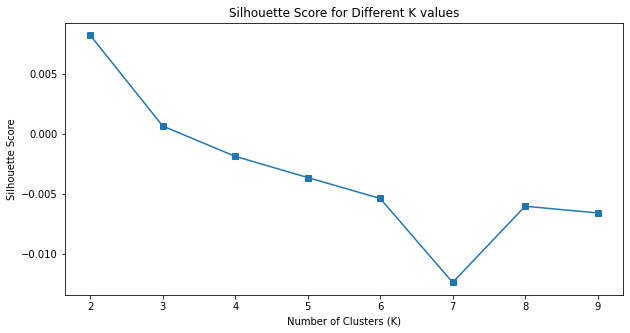

In [26]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Trying different cluster sizes

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm = "elkan")
    kmeans.fit(brain_data_pca)
    
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center
    
    # Calculate silhouette score only if more than 1 cluster exists
    silhouette_scores.append(silhouette_score(brain_data_pca, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K values")
plt.show()


In [35]:
# !pip install kneed


In [34]:
from kneed import KneeLocator

# Find the optimal K using the elbow method
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')

optimal_k = knee.knee
print(f"Optimal number of clusters (K): {optimal_k}")


Optimal number of clusters (K): 5


In [42]:
# Apply K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=5, random_state=42, n_init=10, algorithm="elkan")
clusters = kmeans_optimal.fit_predict(brain_data_pca)

# Add cluster labels to the original dataframe
train_data["Cluster_Label"] = clusters

# Print cluster distribution
print(train_data["Cluster_Label"].value_counts())


Cluster_Label
3    324
4    306
0    242
1    180
2    161
Name: count, dtype: int64


In [52]:
# Assign cluster labels
train_data["Cluster_Label"] = kmeans.labels_

# Select only numeric columns for computing mean values
numeric_cols = train_data.select_dtypes(include=["number"]).columns

# Compute mean values per cluster only for numeric features
cluster_means = train_data.groupby("Cluster_Label")[numeric_cols].mean()

# Display key feature distributions per cluster
cluster_means.head()



# # Check distribution of Sex_F per cluster (if applicable)
# if "Sex_F" in train_data.columns:
#     sex_distribution = train_data.groupby("Cluster_Label")["Sex_F"].mean()
#     print("\nSex Distribution Per Cluster:\n", sex_distribution)

# # Check ADHD-related features across clusters
# adhd_features = ["ADHD_Outcome"] if "ADHD_Outcome" in train_data.columns else []
# if adhd_features:
#     print("\nADHD Feature Distribution Per Cluster:\n", train_data.groupby("Cluster_Label")[adhd_features].mean())


,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Cluster_Label
Cluster_Label,,,,,,,,,,,,,,,,,,,,,
0,0.064238,0.115832,0.056518,0.038890,0.067152,0.080924,0.072707,0.001715,0.023730,-0.004108,...,2017.533058,1.884298,0.406639,2.227273,2.148760,17.640496,23.409091,14.318182,26.136364,0.0
1,0.090565,0.134755,0.067925,0.051790,0.075585,0.090215,0.062072,0.001684,0.006724,-0.003941,...,2017.777778,2.177778,0.350282,1.644444,2.405556,18.066667,24.500000,14.666667,26.166667,1.0
2,0.068477,0.143148,0.061072,0.037728,0.084302,0.122926,0.085232,-0.003354,-0.003616,0.005880,...,2017.559006,1.888199,0.443750,1.869565,2.310559,17.813665,25.559006,14.795031,23.913043,2.0
3,0.037731,0.107716,0.032657,0.047981,0.074814,0.089808,0.071268,0.004575,0.021931,0.002564,...,2017.645062,2.000000,0.489097,2.243827,2.237654,17.379630,25.401235,13.333333,23.364198,3.0
4,0.059979,0.124619,0.087541,0.031788,0.055243,0.083921,0.050688,-0.004427,0.011964,-0.011792,...,2017.728758,2.104575,0.402640,2.160131,2.372549,17.578431,25.408497,14.127451,24.607843,4.0


In [53]:
# Compute the mean ADHD_Outcome per cluster
cluster_adhd = train_data.groupby("Cluster_Label")["ADHD_Outcome"].mean()

# Compute the proportion of Sex_F = 1 per cluster
cluster_sex = train_data.groupby("Cluster_Label")["Sex_F"].mean()

# Map these values to the test dataset based on the assigned cluster
test_data["ADHD_Outcome"] = test_data["Cluster_Label"].map(cluster_adhd)
test_data["Sex_F"] = test_data["Cluster_Label"].map(cluster_sex)

# Display a preview
print(test_data[["participant_id", "ADHD_Outcome", "Sex_F"]].head())


KeyError: 'Column not found: ADHD_Outcome'

In [59]:
original_data 

NameError: name 'original_data' is not defined

In [54]:
print(train_data["Cluster_Label"].unique())


[0 4 1 2 3]


In [58]:
print("ADHD_Outcome" in train_data.columns)


False


In [55]:
print(train_data.columns)


Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'Cluster_Label'],
      dtype='object', length=19929)


In [57]:
print(train_data.columns)                                                


Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'Cluster_Label'],
      dtype='object', length=19929)
